<a href="https://colab.research.google.com/github/Percy-O/House-Price-Predicition/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

%matplotlib inline

## Data Preparation

* Data Preparation
* Data Cleaning
* Dataset informations

In [ ]:
data = pd.read_csv('drive/MyDrive/house/rent_2.csv')

In [ ]:
data.head(5)

,Price,Pid,Property_name,Address,Neighboorhood
0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,Ajah
1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,Ikoyi
2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,Yaba
3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,Surulere
4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,Yaba


# Data Cleaning and Feature Engineering

* Delete duplicate values
* Create Size Column extracted from Property name
* Create Bedroom column
* Create Toilet Column
* Create Bathroom Column

## Data Cleaning

In [ ]:
def unique_list(word):
    ulist = []
    [ulist.append(x) for x in word if x not in ulist]
    return ulist

Size = []
newSize = []
newAddress = []
newProperty = []
for size in data.Property_name:
    nsize = size.split("/",)
    Size.append(nsize[0])

# Zippping all data
datas = zip(Size,data.Address,data.Property_name)

# Deleting all duplicate values
for xsize,xaddress,xproperty in datas :
        newS = xsize.lower()
        newA = xaddress.lower()
        newP = xproperty.lower()
        size_new = ' '.join(unique_list(newS.split()))
        address_new = ' '.join(unique_list(newA.split()))
        property_new = ' '.join(unique_list(newP.split()))
        newSize.append(size_new)
        newAddress.append(address_new)
        newProperty.append(property_new)


data['Address'] = newAddress
data['Property_name'] = newProperty
data['House_type'] = newSize

## Feature Engineering

In [ ]:
bedroom = []
toilet = []
bathroom = []
for others in data.House_type:
    nbed = others.split(" ")
    bedroom.append(nbed[0])

    nbath = others.split(" ")
    bathroom.append(nbath[0])

    ntoilet = others.split(" ")
    toilet.append(ntoilet[0])

# print(bedroom)
data['Bedroom'] = bedroom
data['Bathroom'] = bathroom
data['Toilet'] = toilet

# Getting values if it is a int value
get_string_index= data[data['Bedroom'].str.isdigit() == False].index
# Drop value that is not number
data.drop(get_string_index,axis=0,inplace=True)

# Getting values if it is a int value
get_string_index= data[data['Bathroom'].str.isdigit() == False].index
# Drop value that is not number
data.drop(get_string_index,axis=0,inplace=True)

# Getting values if it is a int value
get_string_index= data[data['Toilet'].str.isdigit() == False].index
# Drop value that is not number
data.drop(get_string_index,axis=0,inplace=True)

# Changing room from object to int
data['Bedroom'] = pd.to_numeric(data['Bedroom'])
data['Bathroom'] = pd.to_numeric(data['Bathroom'])
data['Toilet'] = pd.to_numeric(data['Toilet'])

data.drop(['Pid'],axis=1)
data.to_csv('rents.csv')


In [ ]:
data.head(5)

,Price,Pid,Property_name,Address,Neighboorhood,House_type,Bedroom,Bathroom,Toilet
0,400000,H1190,1 bedroom mini flat / apartment for rent abijo...,fidiso estate abijo ajah lagos,Ajah,1 bedroom mini flat,1,1,1
1,14000000,G7398,3 bedroom flat / apartment for rent gerrard ge...,gerrard gerard road ikoyi lagos,Ikoyi,3 bedroom flat,3,3,3
2,200000,H5843,1 bedroom mini flat / apartment for rent akoka...,obadia akoka yaba lagos,Yaba,1 bedroom mini flat,1,1,1
3,800000,H1194,2 bedroom flat / apartment for rent iju ishaga...,surulere iju ishaga road gbaja lagos,Surulere,2 bedroom flat,2,2,2
4,300000,H5842,1 bedroom mini flat / apartment for rent abule...,close to unilag abule oja yaba lagos,Yaba,1 bedroom mini flat,1,1,1


## Dataset info

Shape of the Dataset

Information About the Dataset

In [ ]:
data.shape

(8831, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 9852
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          8831 non-null   int64 
 1   Pid            8831 non-null   object
 2   Property_name  8831 non-null   object
 3   Address        8831 non-null   object
 4   Neighboorhood  8831 non-null   object
 5   House_type     8831 non-null   object
 6   Bedroom        8831 non-null   int64 
 7   Bathroom       8831 non-null   int64 
 8   Toilet         8831 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 689.9+ KB


Description of the Dataset in respect to the price

In [ ]:
data.describe()

,Price,Bedroom,Bathroom,Toilet
count,8.831000e+03,8831.000000,8831.000000,8831.000000
mean,2.380828e+06,2.889367,2.889367,2.889367
std,7.950422e+06,1.225665,1.225665,1.225665
min,5.000000e+02,1.000000,1.000000,1.000000
25%,6.000000e+05,2.000000,2.000000,2.000000
50%,1.000000e+06,3.000000,3.000000,3.000000
75%,2.500000e+06,3.000000,3.000000,3.000000
max,6.000000e+08,10.000000,10.000000,10.000000


Check if null fields exists

In [ ]:
data.isnull().sum()

Price            0
Pid              0
Property_name    0
Address          0
Neighboorhood    0
House_type       0
Bedroom          0
Bathroom         0
Toilet           0
dtype: int64

## Exploratory Data Analysis

In [ ]:
# check unique number of neighboorhood

check_neighboorhood = data['Neighboorhood'].unique()
print(f" There are {len(check_neighboorhood)} unique Neighboorhood ")


 There are 40 unique Neighboorhood 


In [ ]:
## Checking Outliers Among the data and clean them

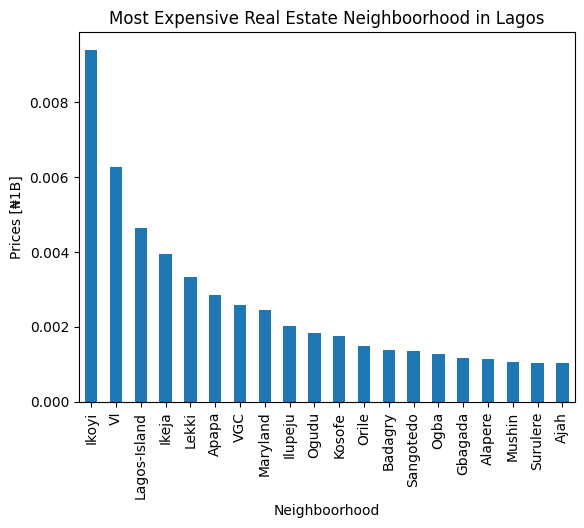

In [ ]:
(
    (data.groupby("Neighboorhood")['Price']
    .mean()/1e9)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Neighboorhood',
         ylabel = "Prices [₦1B]",
         title = "Most Expensive Real Estate Neighboorhood in Lagos")
);

In [ ]:
neighboorhood_records = data["Neighboorhood"].value_counts()
neighboorhood_records

Lekki           1594
Yaba             934
Ikeja            636
Surulere         563
Ojo              522
Ikoyi            511
Gbagada          461
Ajah             427
VI               374
Kosofe           278
Ogba             265
Ipaja            241
Okota            209
Isolo            203
Shomolu          197
Maryland         177
Sangotedo        159
Ikorodu          146
Ogudu            145
Amuwo-Odofin     123
Alimosho         108
Abule-Egba        93
Alapere           85
Oshodi            56
Ilupeju           55
Bariga            49
Agege             48
Igando            36
Apapa             22
Ibeju-Lekki       22
Ikosi             19
Badagry           17
Idimu             16
Mushin            12
Orile              8
VGC                6
Ejigbo             5
Lagos-Island       4
Ifako-Ijaiye       3
Obalende           2
Name: Neighboorhood, dtype: int64

In [ ]:

# Fixing the Outliers

In [ ]:
trim_df = q1, q9 = data["Price"].quantile([0.15,0.85])
mask_df = data["Price"].between(q1,q9)
data = data[mask_df]
data.head(5)

,Price,Pid,Property_name,Address,Neighboorhood,House_type,Bedroom,Bathroom,Toilet
3,800000,H1194,2 bedroom flat / apartment for rent iju ishaga...,surulere iju ishaga road gbaja lagos,Surulere,2 bedroom flat,2,2,2
7,600000,H5838,2 bedroom flat / apartment for rent akoka yaba...,akoka extension yaba lagos,Yaba,2 bedroom flat,2,2,2
8,450000,H5836,1 bedroom mini flat / apartment for rent akoka...,akoka yaba lagos,Yaba,1 bedroom mini flat,1,1,1
9,1000000,H5833,3 bedroom flat / apartment for rent alapere ko...,no 24 emmanuel street alapere kosofe ikosi lagos,Alapere,3 bedroom flat,3,3,3
10,500000,H5832,2 bedroom flat / apartment for rent palmgroove...,ladi lak palmgroove shomolu lagos,Shomolu,2 bedroom flat,2,2,2


In [ ]:
# Getting only neighboorhood that has nothing less than 150 houses

In [ ]:
new_data = data[~data['Neighboorhood'].isin(neighboorhood_records[neighboorhood_records < 150].index)]
new_data['Neighboorhood'].value_counts()

Lekki        1270
Yaba          692
Ikeja         481
Ojo           466
Surulere      449
Gbagada       423
Ajah          377
Kosofe        251
Ogba          227
Okota         195
Isolo         177
VI            164
Sangotedo     140
Maryland      137
Shomolu       124
Ikoyi          90
Ipaja          47
Name: Neighboorhood, dtype: int64

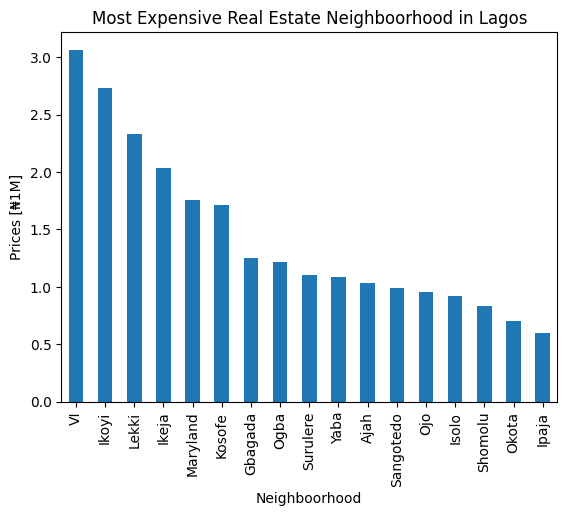

In [ ]:


(
    (new_data.groupby("Neighboorhood")['Price']
    .mean()/1e6)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Neighboorhood',
         ylabel = "Prices [₦1M]",
         title = "Most Expensive Real Estate Neighboorhood in Lagos")
);

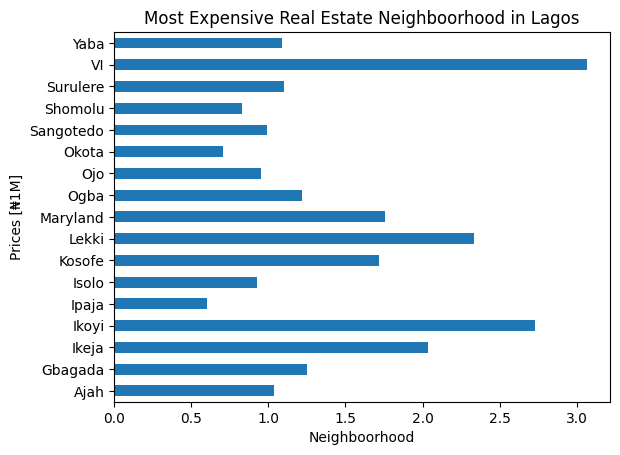

In [ ]:
(
    (new_data.groupby("Neighboorhood")["Price"]
     .mean()/1e6)
    .plot(kind="barh",
          xlabel= 'Neighboorhood',
          ylabel = "Prices [₦1M]",
          title = "Most Expensive Real Estate Neighboorhood in Lagos"
         )
);

## Data Analysis

In [ ]:
def neighboorhood_analysis_pie():
    while True:
        ask = str(input("Enter this query to proceed your visualization ('Yes','Y','y','No','N','n')"))
        if ask in ['Yes','Y','yes','y']:
            neighboorhood = str(input("Enter neighboorhood by adding space (Ajah,Yaba,Surulere,Ikoyi,Lekki,ikeja and so on ): "))
            no_of_house = len(new_data['Neighboorhood'][new_data.Neighboorhood == neighboorhood.capitalize()])
            all_house = len(new_data['Neighboorhood'])
            if (neighboorhood.capitalize() in new_data['Neighboorhood'].array) :
                print("--------------------------------------------------------")
                print(f"---------------------------{neighboorhood}------------------------")
                print("--------------------------------------------------------")
            #     Getting the percentage of houses around the neigboorhood
                total_house_percent = round(all_house * 100/ all_house)
                house_percent = round(no_of_house*100/all_house , ndigits=1)
                remain_percent = round((all_house-no_of_house)*100/all_house,ndigits=1)
            #     visualizing our data
                value = np.array([(no_of_house),(all_house-no_of_house)])
                labels = (f'{no_of_house} houses in {neighboorhood} which is {house_percent}% ',
                          f' Left Houses in other Neighboorhood is {all_house-no_of_house}, which is {remain_percent}% ')
                plt.pie(value,labels=labels,explode=[0.2,0.0],shadow=True )
                plt.title(f'{all_house} as the total houses which is {total_house_percent}% ')
                plt.show()
            else:
                print('Please enter the correct Neighboorhood ')
                continue
        elif ask in ['No','N','no','n']:
            print("--------------------------------------------------------")
            print('------------Visualization Completed---------------------')
            print("--------------------------------------------------------")
            break
        else:
            print('Please enter the correct input')
            continue

neighboorhood_analysis_pie()

Enter this query to proceed your visualization ('Yes','Y','y','No','N','n')n
--------------------------------------------------------
------------Visualization Completed---------------------
--------------------------------------------------------


Enter neighboorhood by adding space (Ajah,Yaba,Surulere,Ikoyi,Lekki,ikeja and so on ):  Ajah Yaba Surulere Ikoyi Lekki ikeja


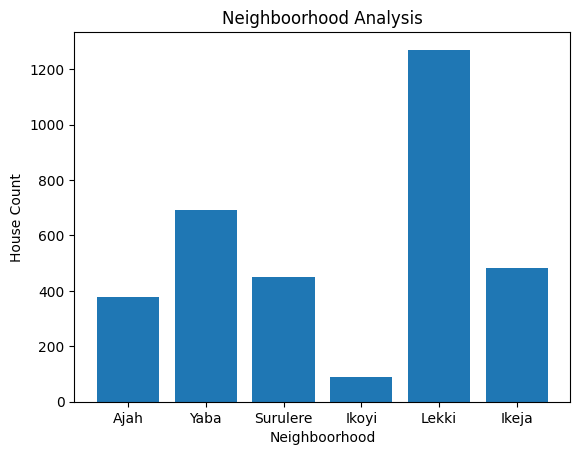

-----------------------------------------------
-----------------Pie Chart---------------------
-----------------------------------------------


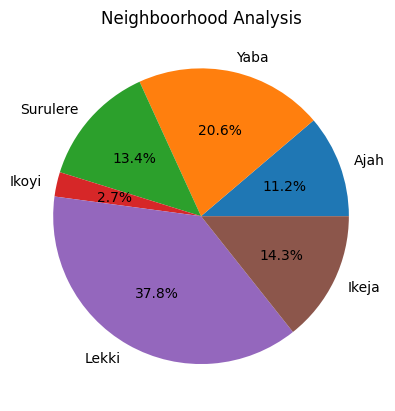

In [ ]:
def neighboorhood_analysis_bar():
    neighboorhood = str(input("Enter neighboorhood by adding space (Ajah,Yaba,Surulere,Ikoyi,Lekki,ikeja and so on ): "))

    # Splitting Neighboorhood
    split_neighboorhood = neighboorhood.split(' ')
    neighboorhoodX =[]
    neighboorhoodY =[]
#     looping the splitted neighboorhood
    for sn in split_neighboorhood:
        if (sn.capitalize() in new_data['Neighboorhood'].array) :
            neighboorhoodX.append(sn.capitalize())
            no_of_house = len(new_data['Neighboorhood'][new_data.Neighboorhood == sn.capitalize()])
            all_house = len(new_data['Neighboorhood'])
            neighboorhoodY.append(no_of_house)

#     Visualizing our data gotten from the splitted neighboorhood

    for X in neighboorhoodX: X
    if (X in new_data['Neighboorhood'].array) :
        plt.bar(x=neighboorhoodX ,height=neighboorhoodY )
        plt.title('Neighboorhood Analysis')
        plt.xlabel('Neighboorhood')
        plt.ylabel('House Count')
        plt.show()

        print('-----------------------------------------------')
        print('-----------------Pie Chart---------------------')
        print('-----------------------------------------------')
        value = np.array(neighboorhoodY)
        labels = (neighboorhoodX)
        plt.pie(value,labels=labels,autopct='%.1f%%' )
        plt.title(f'Neighboorhood Analysis')
        plt.show()
    else: exit()

neighboorhood_analysis_bar()


## Data Correlation

<ipython-input-27-f3dc626e2361>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_data.corr()


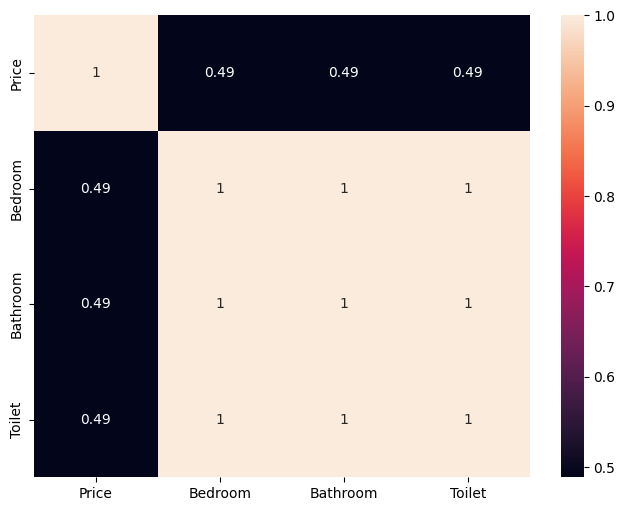

In [ ]:
plt.subplots(figsize=(8,6))
corr = new_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Dataset Spliting

In [ ]:
from sklearn.model_selection import train_test_split

x = new_data.drop(['Price','Pid'],axis=1)
y = new_data['Price']

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4568, 7)
(1142, 7)
(4568,)
(1142,)


## Encoding Categorical Variable of X_train and X_test

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',drop='first')

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Metrics Function

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluate_accuracy(y_test,y_pred):
    r_score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    print(f'R2 Score  -  {r_score * 100}')
    print(f'Mean Squared Error  -  {mse}')
    print(f'Mean Absolute Error  -  {mae}')
    print(f'Root Mean Squared Error  -  {rmse}')


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lr.score(X_train,y_train))

0.9546571371716847


In [ ]:
LR_y_pred = lr.predict(X_test)
evaluate_accuracy(y_test,LR_y_pred)

R2 Score  -  73.31128269629676
Mean Squared Error  -  269123395170.47842
Mean Absolute Error  -  349591.2757421557
Root Mean Squared Error  -  518771.0431110033


## Light GBM

In [ ]:
from lightgbm import LGBMRegressor


lgb = LGBMRegressor(learning_rate=0.02)
lgb.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')


[1]	training's l2: 9.71763e+11	valid_0's l2: 9.83644e+11
[2]	training's l2: 9.47857e+11	valid_0's l2: 9.59254e+11
[3]	training's l2: 9.24898e+11	valid_0's l2: 9.35834e+11
[4]	training's l2: 9.02869e+11	valid_0's l2: 9.13347e+11
[5]	training's l2: 8.81679e+11	valid_0's l2: 8.91581e+11
[6]	training's l2: 8.61335e+11	valid_0's l2: 8.70691e+11
[7]	training's l2: 8.41782e+11	valid_0's l2: 8.50621e+11
[8]	training's l2: 8.23003e+11	valid_0's l2: 8.31352e+11
[9]	training's l2: 8.04954e+11	valid_0's l2: 8.1298e+11
[10]	training's l2: 7.87605e+11	valid_0's l2: 7.95255e+11
[11]	training's l2: 7.70945e+11	valid_0's l2: 7.78208e+11
[12]	training's l2: 7.54939e+11	valid_0's l2: 7.61932e+11
[13]	training's l2: 7.39561e+11	valid_0's l2: 7.46254e+11
[14]	training's l2: 7.24796e+11	valid_0's l2: 7.31285e+11
[15]	training's l2: 7.10596e+11	valid_0's l2: 7.16927e+11
[16]	training's l2: 6.96949e+11	valid_0's l2: 7.0296e+11
[17]	training's l2: 6.83846e+11	valid_0's l2: 6.89539e+11
[18]	training's l2: 6.712

LGBMRegressor(learning_rate=0.02)

In [ ]:
lgb.score(X_train,y_train)

0.6426019043770996

In [ ]:
LGB_y_pred = lgb.predict(X_test)
evaluate_accuracy(y_test,LGB_y_pred)

R2 Score  -  65.17057447404792
Mean Squared Error  -  351212579560.01215
Mean Absolute Error  -  435505.25052562664
Root Mean Squared Error  -  592631.9089958051


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(X_train,y_train)

0.9591236913389035

In [ ]:
from sklearn.model_selection import cross_val_score

get = cross_val_score(dt,X_train,y_train,cv=10)

print(get)

[0.66943665 0.65498241 0.60282064 0.61050518 0.71756555 0.57596003
 0.62613748 0.68527936 0.66109499 0.67410368]


In [ ]:
DT_y_pred = dt.predict(X_test)
evaluate_accuracy(y_test,DT_y_pred)

R2 Score  -  67.82480803439034
Mean Squared Error  -  324447848261.5296
Mean Absolute Error  -  359764.3499148296
Root Mean Squared Error  -  569603.2375799224


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Rf_model = RandomForestRegressor(n_estimators=200)

Rf_model.fit(X_train,y_train)

Rf_model.score(X_train,y_train)


0.9283615372226476

In [ ]:
RF_y_pred = Rf_model.predict(X_test)
evaluate_accuracy(y_test,RF_y_pred)

# print(y_test.head(4).sort_values(ascending=False))
# print(y_pred)

R2 Score  -  71.61637879489955
Mean Squared Error  -  286214448563.60693
Mean Absolute Error  -  342889.8604869921
Root Mean Squared Error  -  534990.1387536101


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200)
gb.fit(X_train,y_train)


GradientBoostingRegressor(n_estimators=200)

In [ ]:
gb.score(X_train,y_train)

0.7316786697915234

In [ ]:
GB_y_pred = gb.predict(X_test)
evaluate_accuracy(y_test,GB_y_pred)

R2 Score  -  68.76029670724104
Mean Squared Error  -  315014577830.57587
Mean Absolute Error  -  405966.16686704394
Root Mean Squared Error  -  561261.5948295196


## Model Score visualization

## Model Score for training

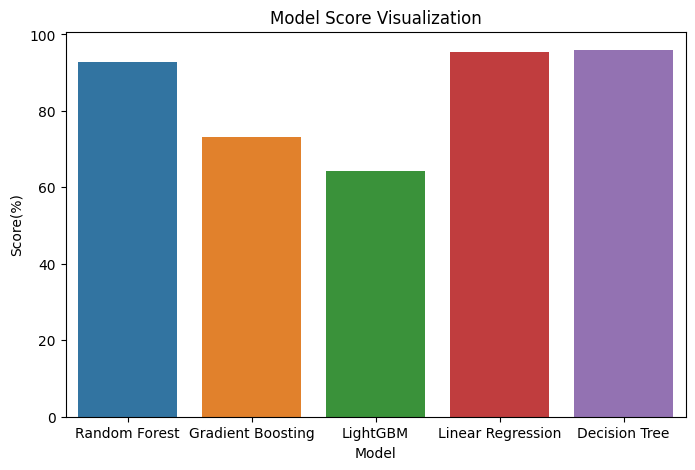

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     Rf_model.score(X_train,y_train) * 100,
     gb.score(X_train,y_train) * 100,
     lgb.score(X_train,y_train) * 100,
     lr.score(X_train,y_train) * 100,
     dt.score(X_train,y_train) * 100
]

plt.figure(figsize=(8,5))
sns.barplot(x=x,y=y)
plt.title('Model Score Visualization')
plt.xlabel('Model')
plt.ylabel('Score(%)')
plt.show()


# Model Score for Testing

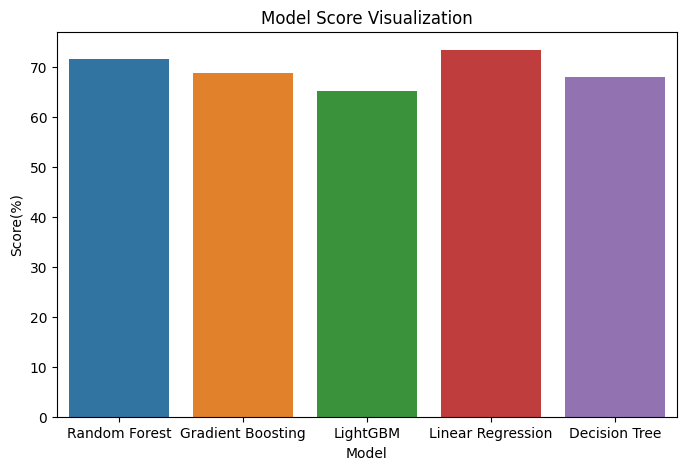

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     r2_score(y_test,RF_y_pred) * 100,
     r2_score(y_test,GB_y_pred) * 100,
     r2_score(y_test,LGB_y_pred) * 100,
     r2_score(y_test,LR_y_pred) * 100,
     r2_score(y_test,DT_y_pred) * 100
]

plt.figure(figsize=(8,5))
sns.barplot(x=x,y=y)
plt.title('Model Score Visualization')
plt.xlabel('Model')
plt.ylabel('Score(%)')
plt.show()


# R2 Score

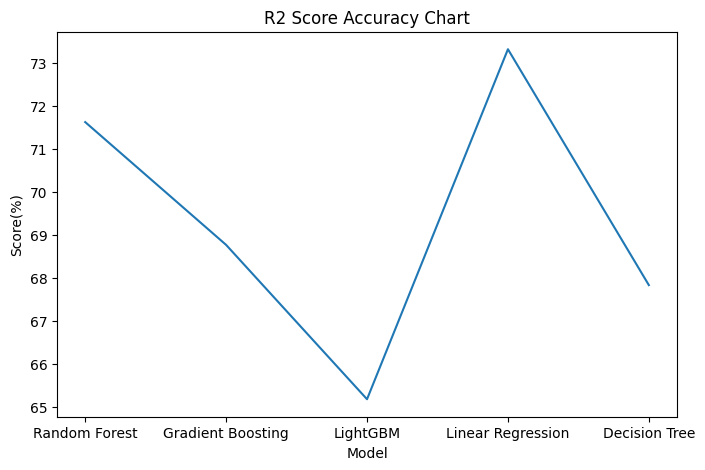

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     r2_score(y_test,RF_y_pred) * 100,
     r2_score(y_test,GB_y_pred) * 100,
     r2_score(y_test,LGB_y_pred) * 100,
     r2_score(y_test,LR_y_pred) * 100,
     r2_score(y_test,DT_y_pred) * 100
]

plt.figure(figsize=(8,5))
sns.lineplot(x=x,y=y)
plt.title('R2 Score Accuracy Chart')
plt.xlabel('Model')
plt.ylabel('Score(%)')
plt.show()


## Mean Squared Error

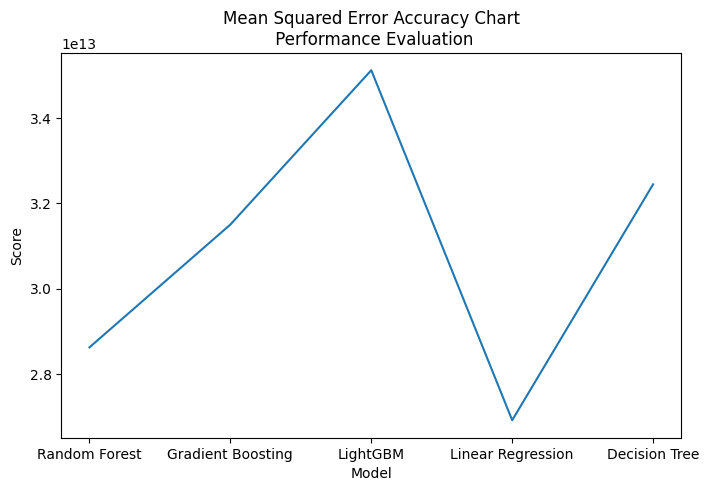

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     mean_squared_error(y_test,RF_y_pred) * 100,
     mean_squared_error(y_test,GB_y_pred) * 100,
     mean_squared_error(y_test,LGB_y_pred) * 100,
     mean_squared_error(y_test,LR_y_pred) * 100,
     mean_squared_error(y_test,DT_y_pred) * 100
]

plt.figure(figsize=(8,5))
sns.lineplot(x=x,y=y)
plt.title('Mean Squared Error Accuracy Chart\n Performance Evaluation')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

## Root Mean Squared Error

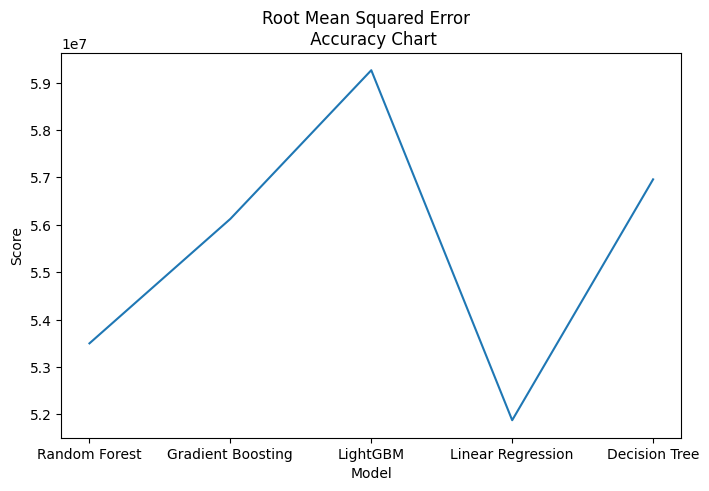

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     np.sqrt(mean_squared_error(y_test,RF_y_pred)) *100,
     np.sqrt(mean_squared_error(y_test,GB_y_pred))* 100,
     np.sqrt(mean_squared_error(y_test,LGB_y_pred)) * 100,
     np.sqrt(mean_squared_error(y_test,LR_y_pred)) * 100,
     np.sqrt(mean_squared_error(y_test,DT_y_pred))* 100
]

plt.figure(figsize=(8,5))
sns.lineplot(x=x,y=y)
plt.title('Root Mean Squared Error  \n Accuracy Chart')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

## Mean Absolute Error

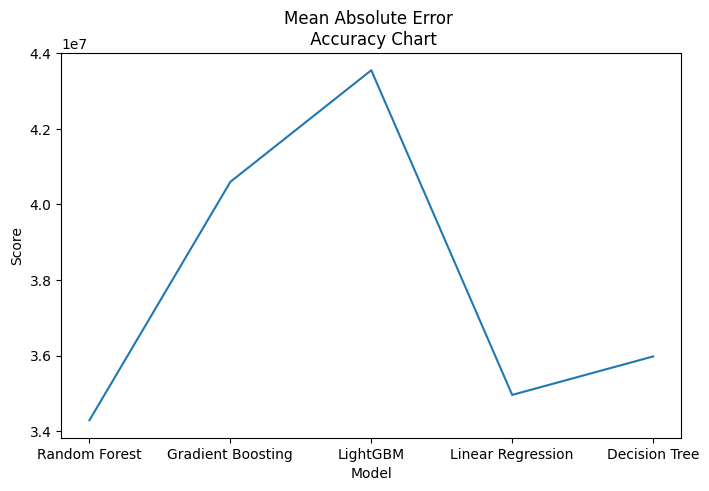

In [ ]:
x =['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree']
y = [

     mean_absolute_error(y_test,RF_y_pred) * 100,
     mean_absolute_error(y_test,GB_y_pred) * 100,
     mean_absolute_error(y_test,LGB_y_pred) * 100,
     mean_absolute_error(y_test,LR_y_pred) * 100,
     mean_absolute_error(y_test,DT_y_pred) * 100
]

plt.figure(figsize=(8,5))
sns.lineplot(x=x,y=y)
plt.title('Mean Absolute Error \n Accuracy Chart')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

In [ ]:
data = {
    'Model':['Random Forest','Gradient Boosting','LightGBM','Linear Regression','Decision Tree'],
    'Score': [
     r2_score(y_test,RF_y_pred) * 100,
     r2_score(y_test,GB_y_pred) * 100,
     r2_score(y_test,LGB_y_pred) * 100,
     r2_score(y_test,LR_y_pred) * 100,
     r2_score(y_test,DT_y_pred) * 100
]
}

accuracy =  pd.DataFrame(data)
accuracy

,Model,Score
0,Random Forest,71.616379
1,Gradient Boosting,68.760297
2,LightGBM,65.170574
3,Linear Regression,73.311283
4,Decision Tree,67.824808
